In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

matplotlib.rcParams.update({ 'font.size': 24, 'text.usetex': True, "font.weight" : 100,
                             "text.latex.preamble" : [r"\usepackage[garamond]{mathdesign}"]})

In [2]:
def genPoints( num, low, high ):
    """Generates num points distributed in the box [low,high]^2."""
    
    return np.random.uniform( low = low, high = high, size = (num, 2) )

In [3]:
num = 200

classA = genPoints( num, 0.1, 10)
labelA = np.ones(num)

classB = genPoints( num, -10, -0.1)
labelB = np.zeros(num)

data = np.append(classA, classB, axis = 0)
y    = np.append(labelA, labelB)

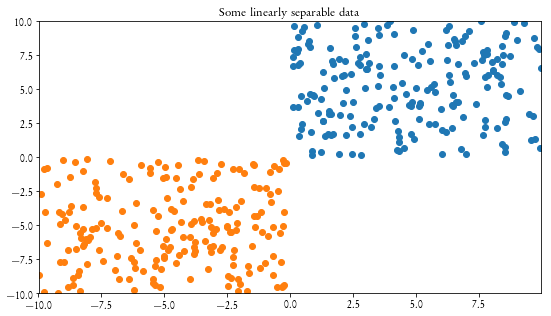

In [30]:
plt.figure(1, (9,5))

plt.scatter(classA[:,0], classA[:,1])
plt.scatter(classB[:,0], classB[:,1])

plt.xlim( xmax = np.max( data[:,0]), xmin = np.min( data[:,0]) )
plt.ylim( ymax = np.max( data[:,1]), ymin = np.min( data[:,1]) )

plt.title("$\mathrm{Some}$ $\mathrm{linearly}$ $\mathrm{separable}$ $\mathrm{data}$")
         
plt.show()

In [5]:
scaler = StandardScaler()
dataPreped = scaler.fit_transform(data)

In [6]:
inds  = np.random.permutation( len(dataPreped) )
randX = dataPreped[inds]
randY = y[inds]

In [33]:
C = 0.4
alpha = 1.0/( len(y) * C )
s = np.random.randint(0,10000)

svc    = SVC( kernel = "linear", C = C, random_state = s )
linSVM = LinearSVC( loss = "hinge", C = C )
sgd = SGDClassifier( loss = "hinge", alpha = alpha, random_state = s  )

svc.fit(randX, randY)
linSVM.fit(randX, randY)
sgd.fit(randX, randY)

/usr/lib/python3/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.00625, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=8199,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [34]:
w1 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b1 = -svc.intercept_[0]/svc.coef_[0, 1]

w2 = -linSVM.coef_[0, 0]/linSVM.coef_[0, 1]
b2 = -linSVM.intercept_[0]/linSVM.coef_[0, 1]

w3 = -sgd.coef_[0, 0]/sgd.coef_[0, 1]
b3 = -sgd.intercept_[0]/sgd.coef_[0, 1]

line1 = scaler.inverse_transform( [[-1000, -1000 * w1 + b1], [1000, 1000 * w1 + b1]] )
line2 = scaler.inverse_transform( [[-1000, -1000 * w2 + b2], [1000, 1000 * w2 + b2]] )
line3 = scaler.inverse_transform( [[-1000, -1000 * w3 + b3], [1000, 1000 * w3 + b3]] )

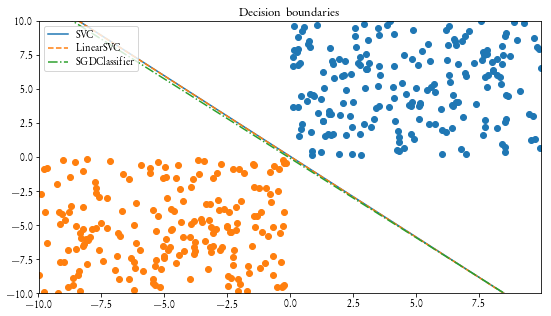

In [35]:
plt.figure(2, (9,5))

plt.scatter(classA[:,0], classA[:,1])
plt.scatter(classB[:,0], classB[:,1])

plt.plot( line1[:,0], line1[:,1], "-", label = "$\mathrm{SVC}$" )
plt.plot( line2[:,0], line2[:,1], "--", label  = "$\mathrm{LinearSVC}$" )
plt.plot( line3[:,0], line3[:,1], "-.", label = "$\mathrm{SGDClassifier}$" )

plt.xlim( xmax = np.max( data[:,0]), xmin = np.min( data[:,0]) )
plt.ylim( ymax = np.max( data[:,1]), ymin = np.min( data[:,1]) )

plt.legend( loc = "best" )

plt.title("$\mathrm{Decision}$ $\mathrm{boundaries}$")
plt.show()